# Project 1

Given the following topographical map

![img](images/nechelik_depth.png)


Implement the Python function `extrapolate_depth()` below to interpolate/extrapolate the depth information contained in the topographic map to a grid overlaying the field.  The function should take three arguements, a `filename`, and $N_x$ and $N_y$ cooresponding to the number of grid points to interpolate to in the $x$ and $y$ directions, respectively.  The grid points should be considered the center of blocks that span the entire domain in each direction.  Use the left edge of the field as the $x=0$ datum and the top of the field as the $y=0$ datum.  Each grid on the map spans $523$ ft.

To digitize the topographic map, use the web-based [WebPlotDigitizer](https://apps.automeris.io/wpd/), and refer to the [YouTube tutorial](https://youtu.be/AJIM_Cq2WcU) for help. The user interface has changed a little since recording this video, but the basic ideas and usage are the same.  An additional resource for help is located [here](https://automeris.io/WebPlotDigitizer/tutorial.html).  Please name your data file `'Nechelik_Data.csv'` and add be sure to add it to the repository upon submission.

The function `extrapolate_depth()` should return an array with $N_y$ rows and $N_x$ columns containing the depth values (this is the natural way the SciPy function `griddata()` will return values).  The test checks for the acccuracy of a section of this data away from the boundaries of the field.  The tolerance on the tests is loose enough, such that small errors in digitizing the data will not cause the test to fail.  I have verified this myself with multiple digitizations.

You should use a 2-step interpolate then extrapolate procedure.  First, interpolate the data with `griddata()` using the `method=cubic` option.  This will give you a high-accuracy interpolation, but only inside the [convex hull](https://en.wikipedia.org/wiki/Convex_hull) of the digitized data.  To extend the data to the boundaries of the reservoir use the newly interpolated values as the data in an additional call to `griddata()` this time using the `method=nearest` option.  This will fill in the rest of the domain with constant values according to the value of the nearest data point.  Next, replace any unphysical values, i.e. negative depths, with 0.0.  Finally, you should *mask* the final values with `nan` for any ($x,y$) grid point location outside the boundaries of the domain.  This will allow you to easily create a contour plot like this one

![img](images/contour.png)

Plots may be useful for checking the *sanity* of your results, but it's the actual values that will be tested.  Your final submission and function `extraploate_depth()` should not contain any plot commands.

import numpy as np
import scipy.interpolate
import matplotlib.path
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from scipy.interpolate import griddata
from matplotlib.path import Path

dat=pd.read_csv('Nechelik_Data.csv')

Xcord=list(itertools.chain(dat['X0'],dat['X25'],dat['X50'],dat['X75'],dat['X100'],dat['X125'],dat['X150']))
Ycord=list(itertools.chain(dat['Y0'],dat['Y25'],dat['Y50'],dat['Y75'],dat['Y100'],dat['Y125'],dat['Y150']))

XB=dat['XB']
YB=dat['YB']

Xc=[x for x in Xcord if pd.isnull(x) == False]
Yc=[x for x in Ycord if pd.isnull(x) == False]

#Creat Depth listh
ZB=np.zeros(18)
Z0=np.zeros(76)
Z25=np.ones(123)*25
Z50=np.ones(113)*50
Z75=np.ones(108)*75
Z100=np.ones(100)*100
Z125=np.ones(126)*125
Z150=np.ones(61)*150

Zc=list(itertools.chain(Z0,Z25,Z50,Z75,Z100,Z125,Z150))



X,Y,Z cord=list with nan
Xc,Yc,Zc,= list without nan

#creating centered linspace for meshgrid
xmin=np.min(Xc)
ymin=np.min(Yc)
xmax=np.max(Xc)
ymax=np.max(Yc)
Nx=100
Ny=100
dx=(xmax-xmin)/Nx
dy=(ymax-ymin)/Ny
x=np.linspace(xmin+dx/2,xmax-dx/2,Nx)
y=np.linspace(ymin+dy/2,ymax-dy/2,Ny)

#create coordinate for closed path
xylists=[[] for _ in range(18)]
for i in range(18):
    xylists[i]=[XB[i],YB[i]]
print(xylists)

#meshgrid and interpolation
xx,yy=np.meshgrid(x,y)
#fig, ax = plt.subplots()
dat=griddata((Xc,Yc),Zc,(xx,yy),method='cubic')

#extrapolate
xflat=np.ndarray.flatten(xx)
yflat=np.ndarray.flatten(yy)
xflat.shape=(Nx*Ny)
yflat.shape=(Nx*Ny)
values=np.ndarray.flatten(dat)
df1=pd.DataFrame({"x":xflat,"y":yflat,"values":values})
df1.dropna(inplace=True)
xfixed=df1["x"].values
yfixed=df1["y"].values
xfixed.shape=(len(xfixed),1)
yfixed.shape=(len(yfixed),1)
points=np.concatenate((xfixed,yfixed),axis=1)
values=df1["values"]
dat=griddata(points,values,(xx,yy), method='nearest')


#create path use contain points(true false array for every grid), if false, replace with nans
path=Path(xylists)
xflat.shape=(Nx*Ny,1)
yflat.shape=(Nx*Ny,1)
Allpoints=np.concatenate((xflat,yflat),axis=1)
mask=path.contains_points(Allpoints)
mask.shape=dat.shape
dat[~mask]=np.nan


#meshgrid and interpolation
fig, ax = plt.subplots()
ct=ax.contourf(xx,yy,dat,levels=10)
print(xylists)


In [148]:
def extrapolate_depth(filename, Nx, Ny):
    import numpy as np
    import scipy.interpolate
    import matplotlib.path
    import matplotlib.pyplot as plt
    import pandas as pd
    import itertools
    from scipy.interpolate import griddata
    from matplotlib.path import Path
    import math
    
    dat=pd.read_csv(filename)
    Xcord=list(itertools.chain(dat['X0'],dat['X25'],dat['X50'],dat['X75'],dat['X100'],dat['X125'],dat['X150']))
    Ycord=list(itertools.chain(dat['Y0'],dat['Y25'],dat['Y50'],dat['Y75'],dat['Y100'],dat['Y125'],dat['Y150']))

    XB=dat['XB']
    YB=dat['YB']

    Xc=[x for x in Xcord if pd.isnull(x) == False]
    Yc=[x for x in Ycord if pd.isnull(x) == False]

    #Creat Depth listh
    ZB=np.zeros(18)
    Z0=np.zeros(76)
    Z25=np.ones(123)*25
    Z50=np.ones(113)*50
    Z75=np.ones(108)*75
    Z100=np.ones(100)*100
    Z125=np.ones(126)*125
    Z150=np.ones(61)*150

    Zc=list(itertools.chain(Z0,Z25,Z50,Z75,Z100,Z125,Z150))
    #creating centered linspace for meshgrid
    xmin=np.min(Xc)
    ymin=np.min(Yc)
    xmax=np.max(Xc)
    ymax=np.max(Yc)
    #Nx=Nx
    #Ny=Ny
    dx=(xmax-xmin)/Nx
    dy=(ymax-ymin)/Ny
    x=np.linspace(xmin+dx/2,xmax-dx/2,Nx)
    y=np.linspace(ymin+dy/2,ymax-dy/2,Ny)



    #create coordinate for closed path
    xylists=[[] for _ in range(18)]
    for i in range(18):
        xylists[i]=[XB[i],YB[i]]


    #meshgrid and interpolation
    xx,yy=np.meshgrid(x,y)
    dat=griddata((Xc,Yc),Zc,(xx,yy),method='cubic')
   

    #extrapolate
    xflat=np.ndarray.flatten(xx)
    yflat=np.ndarray.flatten(yy)
    xflat.shape=(Nx*Ny)
    yflat.shape=(Nx*Ny)
    values=np.ndarray.flatten(dat)
    df1=pd.DataFrame({"x":xflat,"y":yflat,"values":values})
    df1.dropna(inplace=True)
    xfixed=df1["x"].values
    yfixed=df1["y"].values
    xfixed.shape=(len(xfixed),1)
    yfixed.shape=(len(yfixed),1)
    points=np.concatenate((xfixed,yfixed),axis=1)
    values=df1["values"]
    dat=griddata(points,values,(xx,yy), method='nearest',rescale=False)


    #create path use contain points(true false array for every grid), if false, replace with nans
    path=Path(xylists)
    xflat.shape=(Nx*Ny,1)
    yflat.shape=(Nx*Ny,1)
    Allpoints=np.concatenate((xflat,yflat),axis=1)
    mask=path.contains_points(Allpoints)
    mask.shape=dat.shape
    dat[~mask]=np.nan
    fig,ax=plt.subplots()
    ct=ax.contourf(xx,yy,dat)
    fig.colorbar(ct)
    
    for i in range(len(dat)):
        for j in range(len(dat[i][:])):
            if dat[i][j]<0:
                dat[i][j]=0
        
    return  dat

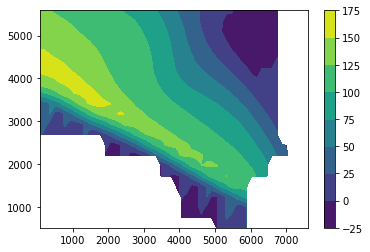

In [149]:
import matplotlib.pyplot as plt
dat=extrapolate_depth('Nechelik_Data.csv',54,22)
